# Pupil position

During the experiment, a camera is recording one of the mouse's eyes. The resulting images are processed to give the x and y position of the pupil during the trials. 

In this notebook we will analyse this pupil position data



In [2]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1) Loading dataset and making data selections

Load the data into an xarray dataset

In [107]:
dataset = xr.load_dataset('/home/ben/ibots/workshop_data/steinmetz_mouse/convert_steinmetz_dataset/data/processed/neuropixels/steinmetz_2017-01-08_Muller.nc')

In [108]:
# drop non active trials from dataframe!
# THIS SHOULD BE DONE IN DATA PREPROCESSING! NOT AN EXERCISE FOR THE STUDENTS
dataset = dataset.where(dataset.active_trials==1 , drop=True)

Locate the data relevant to the pupil and store it in a variable named `pupil_data`. Hint - you can use `dataset[variable_names]`

In [51]:
pupil_data = dataset[["pupil_area", "pupil_x", "pupil_y"]]

Individual trials can be selected using the `.sel` method on `pupil_data`. 
Select the data corresponding to trial 50 and set it to a variable named `trial_50`

In [52]:
trial_50 = pupil_data.sel(trial=50)

Convert the trial 50 data to a dataframe and reset the index (just as was done in the previous session). Name the dataframe `df`

In [53]:
df = trial_50.to_dataframe()
df.reset_index(inplace=True)

## 2) Visualisation - Scatter plots and colourbars

Make a scatter plot showing the x and y positions of the pupil during trial 50

Text(0, 0.5, 'pupil y position')

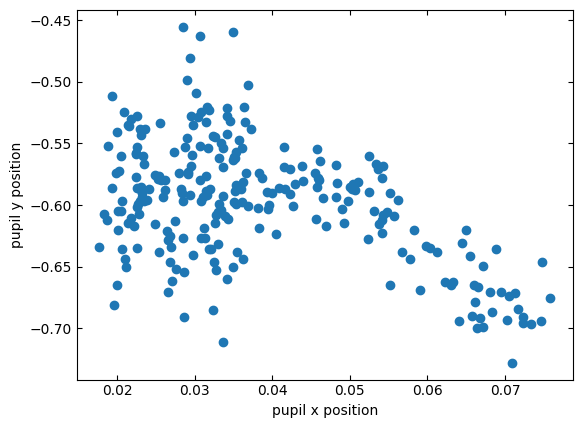

In [54]:
plt.scatter(df.pupil_x, df.pupil_y)

plt.xlabel('pupil x position')
plt.ylabel('pupil y position')

It is helpful to visualise the arrow of time in the above plot. 

Make the same scatter plot where the points are coloured according to the time in the trial. 

Hint - use `plt.scatter?` to show information about the scatter function and choose the appropriate argument to use. 

A colourbar is displayed with `plt.colorbar()`

In [57]:
plt.scatter?

Signature:
plt.scatter(
    x: 'float | ArrayLike',
    y: 'float | ArrayLike',
    s: 'float | ArrayLike | None' = None,
    c: 'Sequence[ColorType] | ColorType | None' = None,
    marker: 'MarkerType | None' = None,
    cmap: 'str | Colormap | None' = None,
    norm: 'str | Normalize | None' = None,
    vmin: 'float | None' = None,
    vmax: 'float | None' = None,
    alpha: 'float | None' = None,
    linewidths: 'float | Sequence[float] | None' = None,
    *,
    edgecolors: "Literal['face', 'none'] | ColorType | Sequence[ColorType] | None" = None,
    plotnonfinite: 'bool' = False,
    data=None,
    **kwargs,
) -> 'PathCollection'
Docstring:
A scatter plot of *y* vs. *x* with varying marker size and/or color.

Parameters
----------
x, y : float or array-like, shape (n, )
    The data positions.

s : float or array-like, shape (n, ), optional
    The marker size in points**2 (typographic points are 1/72 in.).
    Default is ``rcParams['lines.markersize'] ** 2``.

    The linewidth 

Text(0, 0.5, 'pupil y position')

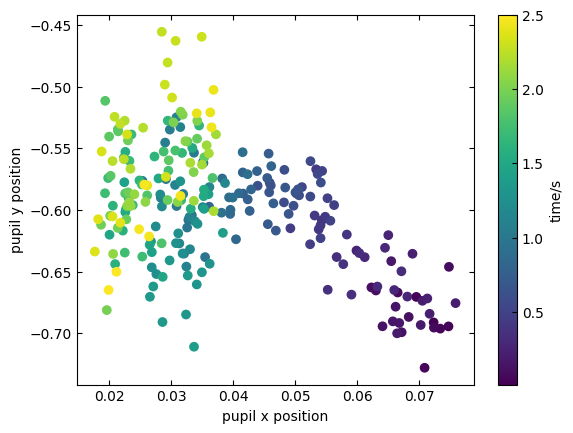

In [55]:
plt.scatter(df.pupil_x, df.pupil_y, c=df.time)
plt.colorbar(label='time/s')

plt.xlabel('pupil x position')
plt.ylabel('pupil y position')

# Distribution of pupil position

**Libraries Used:**

- **xarray:** 
  - `xr.load_dataset()`: Loads a dataset from a specified file path using the xarray library. It facilitates data manipulation and analysis of multi-dimensional arrays.
  - `to_dataframe()`: Converts the loaded xarray dataset into a Pandas DataFrame for easier data manipulation and analysis.
 
- **Pandas:**
    - `df.reset_index()`: reset the index of a dataframe.
    - `df.groupby('grouping_variable')`: split a dataframe into chunks according to a `grouping_variable`
    - `df.DataFrame({'col1':col1_values, 'col2':col2_values}`: create a dataframe from a dictionary of data columns

**Exercises**

Create a dataframe named `df` containing the columns `"contrast_left","contrast_right","pupil_x","pupil_y","feedback_type", "response_type"`

In [197]:
df = dataset[["contrast_left","contrast_right","pupil_x","pupil_y","feedback_type", "response_type"]].to_dataframe()

Create a new column named `contrast_difference` that is the absolute value of the difference between the left and right contrasts

In [201]:
df['contrast_difference'] = (df.contrast_left - df.contrast_right).abs()

In order to see how many contrast difference values there are, we can use a method `value_counts('column_name')` on the dataframe. 

Use this method to count how many trials have certain contrast differences.

In [204]:
df.value_counts('contrast_difference')

contrast_difference
0.0      12000
50.0     10500
100.0     9000
75.0      3500
25.0      2750
Name: count, dtype: int64

The column `response_type` tells us which direction the mouse turned the wheel. `response_type` 1 corresponds to a right turn, while -1 a left turn.

Add a column named `response_turn` to your dataframe and set it to be 'R' where `response_type` is 1

In [200]:
df.response_type = 'No'
df.loc[(df['response_type'] == 1) , 'response_turn'] = 'R'

Do the same for when `response_type` is -1, setting the `response_turn` to 'L'

In [199]:
df.loc[(df['response_type'] == -1) , 'response_turn'] = 'L'

Create a new dataframe `contrast_diff_100_l` which contains all datapoints where the contrast difference is 100 and the mouse turned the wheel to the left.

In [170]:
contrast_diff_100_df_l = df[(df['contrast_diff']==100) & (df['response_turn']=='L')]

`plt.hist(data)` produces a histogram of the inputted data.

Plot a histogram of the pupil x position when the contrast difference was 100 and the wheel was turned to the left.

Text(0, 0.5, 'counts')

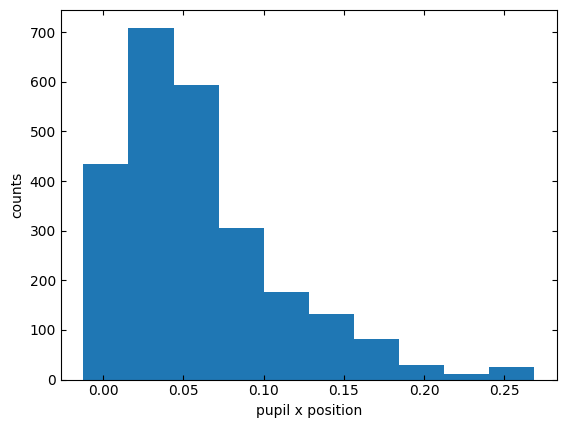

In [207]:
plt.hist(contrast_diff_100_df_l.pupil_x)
plt.xlabel('pupil x position')
plt.ylabel('counts')

Create a new dataframe `contrast_diff_100_r` which contains all datapoints where the contrast difference is 100 and the mouse turned the wheel to the right.

In [210]:
contrast_diff_100_r = df[(df['contrast_difference']==100)&(df['response_turn']=='R')]

By calling `plt.hist(data)` multiple times, histograms are plotted on top of oneanother. This allows us to directly compare different datasets.

Make a histogram plot showing the pupil x positions of both dataframes `contrast_diff_100_r` and `contrast_diff_100_l`

Text(0, 0.5, 'counts')

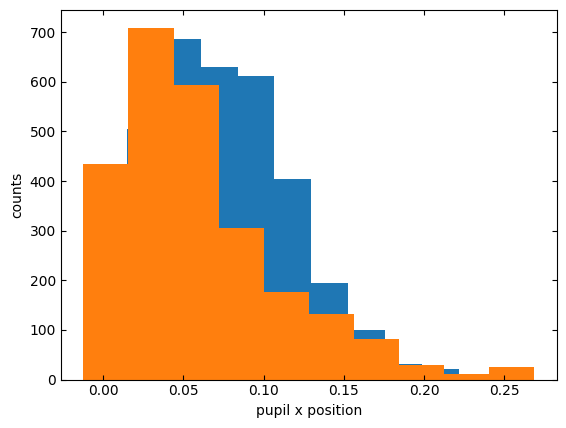

In [214]:
plt.hist(contrast_diff_100_df_r.pupil_x)
plt.hist(contrast_diff_100_df_l.pupil_x)
plt.xlabel('pupil x position')
plt.ylabel('counts')

Unfortunately the histograms block eachother so we cannot see them well. 

We can change the opacity of the histogram with the `alhpa` argument of `plt.hist`. The `alpha` argument takes a value between 0 and 1.

Remake the above plot, altering the `alpha` value so that both distributions can be seen.

Text(0, 0.5, 'counts')

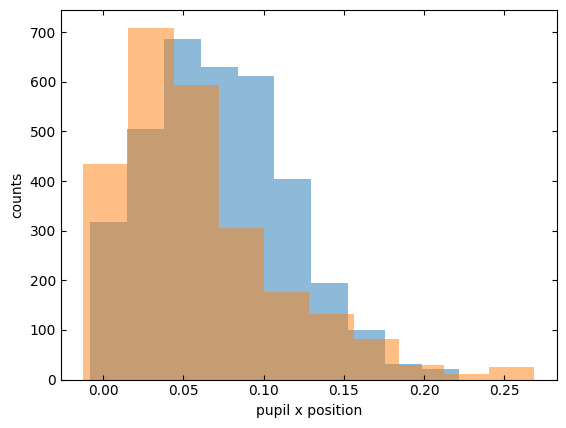

In [215]:
plt.hist(contrast_diff_100_df_r.pupil_x, alpha=0.5)
plt.hist(contrast_diff_100_df_l.pupil_x, alpha=0.5)
plt.xlabel('pupil x position')
plt.ylabel('counts')

In [193]:
contrast_diff_25_df_l = df[(df['contrast_diff']==25)&(df['response_turn']=='L')]
contrast_diff_25_df_r = df[(df['contrast_diff']==25)&(df['response_turn']=='R')]

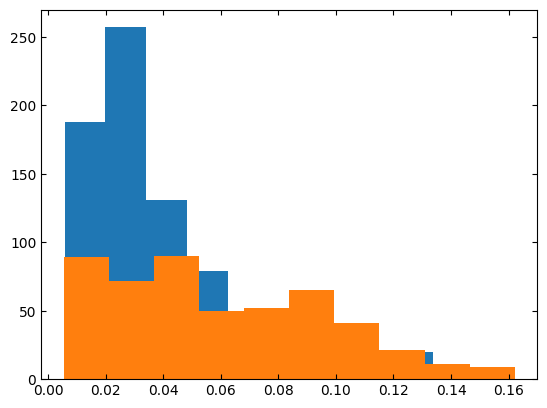

In [194]:
plt.hist(contrast_diff_25_df_l.pupil_x);
plt.hist(contrast_diff_25_df_r.pupil_x);

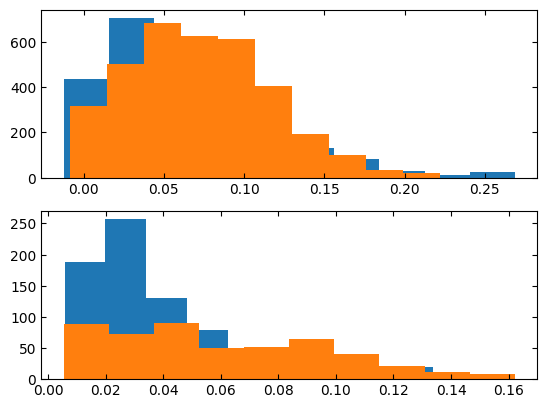

In [195]:
fig, axs = plt.subplots(2,1)

axs[0].hist(contrast_diff_100_df_l.pupil_x);
axs[0].hist(contrast_diff_100_df_r.pupil_x);

axs[1].hist(contrast_diff_25_df_l.pupil_x);
axs[1].hist(contrast_diff_25_df_r.pupil_x);

In [ ]:


dat
dat=dat[(dat.feedback_type==1) &(dat.response_turn!='No')]
dat[["contrast_diff", "response_turn"]].value_counts()
for dif, dfg in dat.groupby('contrast_diff'):
    l=dfg[dfg.response_turn=='L']
    r=dfg[dfg.response_turn=='R']
    
    plt.hist(r.pupil_x, alpha=0.3, label='r', density=True,bins=20)
    plt.hist(l.pupil_x, alpha=0.3, label='l', density=True,bins=20)
    
    plt.legend()
    plt.title(dif)
    plt.xlabel('pupil x pos')
    plt.show()

    print(dif, np.round(l.pupil_x.mean(),3), np.round(r.pupil_x.mean(),3))

## 3) Pupil speed 

Let's investigate the how the speed of the pupil behaves over all trials. First, make a dataframe named `df` containing the pupil data from all trials.

In [57]:
df = pupil_data.to_dataframe()
df.reset_index(inplace=True)

Now calculate the speed of the pupil in the x direction. Speed is the distance moved in a time interval divided by that time interval. 

First find the distance moved between timepoints in the x direction

In [23]:
pupil_x_distance = df['pupil_x'].diff()

Then get the difference between timepoints

In [58]:
time_difference = df['time'].diff()

Calculate the speed in the x direction using the two differences calculated above and add a new column in `df` named `pupil_x_speed` containing this information

In [59]:
pupil_x_speed = pupil_x_distance/time_difference

df['pupil_x_speed'] = pupil_x_speed

Do the same for the y-direction

In [60]:
df['pupil_y_speed'] = df['pupil_y'].diff()/time_difference

Calculate the magnitude of the speed by summing the squares of the speeds in each direction and squarerooting.

Add a new column named `pupil_speed` to `df`

In [61]:
df['pupil_speed'] = np.sqrt(df['pupil_y_speed']**2 + df['pupil_x_speed']**2)

We may now analyse statistics of the pupil speed across all trials with the pandas `groupby` function.

Use the `groupby` function to find the mean pupil speed for each trial

In [62]:
df.groupby('trial')['pupil_speed'].mean()

trial
1       6.478424
2       5.896917
3       5.378753
4       6.295295
5      31.348296
         ...    
257     2.130530
258     2.104850
259     1.951797
260     2.514651
261     3.801332
Name: pupil_speed, Length: 261, dtype: float64

Plot a histogram of the mean pupil speeds for each trial

Text(0, 0.5, 'counts')

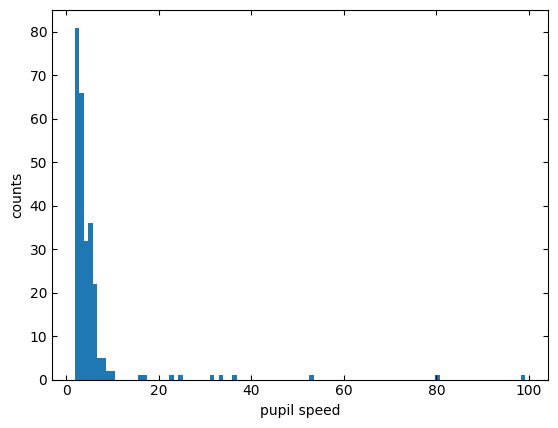

In [63]:
plt.hist(df.groupby('trial')['pupil_speed'].mean(), 100);

plt.xlabel('pupil speed')
plt.ylabel('counts')

In [30]:
dataset.wheel

<xarray.DataArray 'wheel' (mouse: 1, session_date: 1, trial: 364, time: 250)>
array([[[[-1,  0,  0, ...,  1,  0,  1],
         [ 0, -1,  0, ...,  1,  0,  0],
         [ 0,  0, -1, ..., -1,  0,  0],
         ...,
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0]]]], dtype=int8)
Coordinates:
  * mouse         (mouse) object 'Cori'
  * session_date  (session_date) object '2016-12-14'
  * trial         (trial) int64 1 2 3 4 5 6 7 8 ... 358 359 360 361 362 363 364
  * time          (time) float64 0.01 0.02 0.03 0.04 0.05 ... 2.47 2.48 2.49 2.5

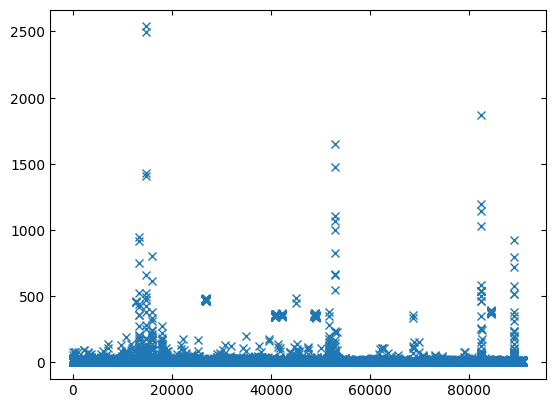

In [35]:
plt.plot(df.pupil_speed, 'x')

In [64]:
dataset.sel(trial=50)['wheel'].values

array([[[ 0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  1,  0,  0,  0,
          0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0, -1,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  1,
          0,  0,  1,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  1,
          0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0, -1,  0,  0,  0,  0,
          1,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
          0, -1,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0

In [65]:
wheel_speeds = dataset.wheel
wheel_speeds.values.flatten()

array([ 1,  0,  0, ..., -2, -1, -1], dtype=int8)

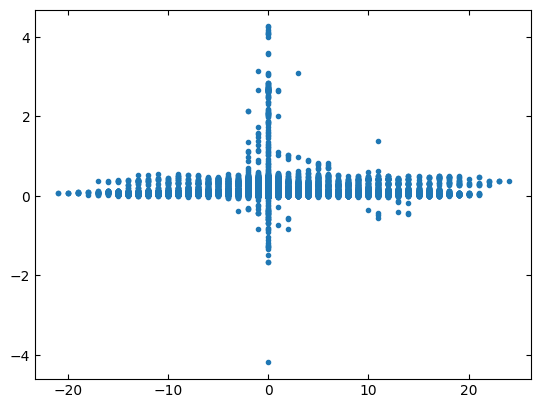

In [69]:
plt.scatter(wheel_speeds.values.flatten(),df.pupil_x, marker='.')

In [70]:
dataset

<xarray.Dataset>
Dimensions:         (mouse: 1, session_date: 1, trial: 261, time: 250,
                     cell: 1268)
Coordinates:
  * mouse           (mouse) object 'Muller'
  * session_date    (session_date) object '2017-01-08'
  * trial           (trial) int64 1 2 3 4 5 6 7 ... 255 256 257 258 259 260 261
  * time            (time) float64 0.01 0.02 0.03 0.04 ... 2.47 2.48 2.49 2.5
  * cell            (cell) int64 1 2 3 4 5 6 7 ... 1263 1264 1265 1266 1267 1268
Data variables: (12/24)
    contrast_left   (mouse, session_date, trial) int8 50 0 100 0 ... 100 0 100 0
    contrast_right  (mouse, session_date, trial) int8 0 50 25 100 ... 100 25 25
    gocue           (mouse, session_date, trial) float64 0.9828 0.902 ... nan
    stim_onset      (mouse, session_date, trial) float64 0.5 0.5 0.5 ... 0.5 0.5
    feedback_type   (mouse, session_date, trial) float64 1.0 1.0 1.0 ... nan nan
    feedback_time   (mouse, session_date, trial) float64 1.272 1.104 ... nan nan
    ...              ...
    spks            (mouse, session_date, cell, trial, time) int8 0 0 0 ... 0 0
    trough_to_peak  (mouse, session_date, cell) int8 15 14 14 17 ... 25 13 24 24
    ccf_ap          (mouse, session_date, cell) float64 7.172e+03 ... nan
    ccf_dv          (mouse, session_date, cell) float64 3.336e+03 ... nan
    ccf_lr          (mouse, session_date, cell) float64 4.226e+03 ... nan
    brain_area      (mouse, session_date, cell) object 'PO' 'PO' ... 'root'
Attributes:
    bin_size:    0.01
    stim_onset:  0.5

In [74]:
dataset['response_turn']= 'No'
#df.loc[(df['response'] == 1) , 'response_turn'] = 'R'
#df.loc[(df['response'] == -1) , 'response_turn'] = 'L'
dataset.where(dataset['response_type'] ==1)['response_turn'] = 'R'
dataset

<xarray.Dataset>
Dimensions:         (mouse: 1, session_date: 1, trial: 261, time: 250,
                     cell: 1268)
Coordinates:
  * mouse           (mouse) object 'Muller'
  * session_date    (session_date) object '2017-01-08'
  * trial           (trial) int64 1 2 3 4 5 6 7 ... 255 256 257 258 259 260 261
  * time            (time) float64 0.01 0.02 0.03 0.04 ... 2.47 2.48 2.49 2.5
  * cell            (cell) int64 1 2 3 4 5 6 7 ... 1263 1264 1265 1266 1267 1268
Data variables: (12/25)
    contrast_left   (mouse, session_date, trial) int8 50 0 100 0 ... 100 0 100 0
    contrast_right  (mouse, session_date, trial) int8 0 50 25 100 ... 100 25 25
    gocue           (mouse, session_date, trial) float64 0.9828 0.902 ... nan
    stim_onset      (mouse, session_date, trial) float64 0.5 0.5 0.5 ... 0.5 0.5
    feedback_type   (mouse, session_date, trial) float64 1.0 1.0 1.0 ... nan nan
    feedback_time   (mouse, session_date, trial) float64 1.272 1.104 ... nan nan
    ...              ...
    trough_to_peak  (mouse, session_date, cell) int8 15 14 14 17 ... 25 13 24 24
    ccf_ap          (mouse, session_date, cell) float64 7.172e+03 ... nan
    ccf_dv          (mouse, session_date, cell) float64 3.336e+03 ... nan
    ccf_lr          (mouse, session_date, cell) float64 4.226e+03 ... nan
    brain_area      (mouse, session_date, cell) object 'PO' 'PO' ... 'root'
    response_turn   <U2 'No'
Attributes:
    bin_size:    0.01
    stim_onset:  0.5

In [130]:
rdat = dataset.where((dataset['response_type'] ==1 and dataset['feedback_type']==1), drop=True)[["pupil_area", "pupil_x", "pupil_y"]]
rdat_df = rdat.to_dataframe().reset_index()

np.shape(rdat_df.pupil_x), np.shape(rdat_df.pupil_y)
plt.scatter(rdat_df.pupil_x, rdat_df.pupil_y, marker='.', color='r')

ldat = dataset.where(dataset['response_type'] ==-1, drop=True)[["pupil_area", "pupil_x", "pupil_y"]]
ldat_df = ldat.to_dataframe().reset_index()

plt.scatter(ldat_df.pupil_x, ldat_df.pupil_y, marker='.', color='g')

SyntaxError: invalid decimal literal (1804260174.py, line 1)

In [139]:
dat = dataset[["contrast_left","contrast_right","pupil_x","pupil_y","feedback_type", "response_type"]].to_dataframe()
dat
dat['response_turn']= 'No'
dat.loc[(dat['response_type'] == 1) , 'response_turn'] = 'R'
dat.loc[(dat['response_type'] == -1) , 'response_turn'] = 'L'

dat=dat[dat.feedback_type==1]
dat[["contrast_left", "contrast_right", "response_turn"]].value_counts()


contrast_left  contrast_right  response_turn
0.0            0.0             No               7500
100.0          0.0             R                3500
50.0           0.0             R                2750
0.0            100.0           L                2500
               50.0            L                2000
100.0          25.0            R                1500
               50.0            R                1500
25.0           100.0           L                1000
50.0           50.0            R                1000
               100.0           L                 750
25.0           50.0            L                 500
0.0            25.0            L                 250
25.0           0.0             R                 250
50.0           25.0            R                 250
100.0          100.0           R                 250
Name: count, dtype: int64

In [154]:
dat = dataset[["contrast_left","contrast_right","pupil_x","pupil_y","feedback_type", "response_type"]].to_dataframe()
dat['contrast_diff'] = (dat.contrast_left - dat.contrast_right).abs()
dat['response_turn']= 'No'
dat.loc[(dat['response_type'] == 1) , 'response_turn'] = 'R'
dat.loc[(dat['response_type'] == -1) , 'response_turn'] = 'L'

dat
dat=dat[(dat.feedback_type==1) &(dat.response_turn!='No')]
dat[["contrast_diff", "response_turn"]].value_counts()


contrast_diff  response_turn
50.0           R                4250
100.0          R                3500
50.0           L                2750
100.0          L                2500
75.0           R                1500
0.0            R                1250
75.0           L                1000
25.0           L                 750
               R                 500
Name: count, dtype: int64

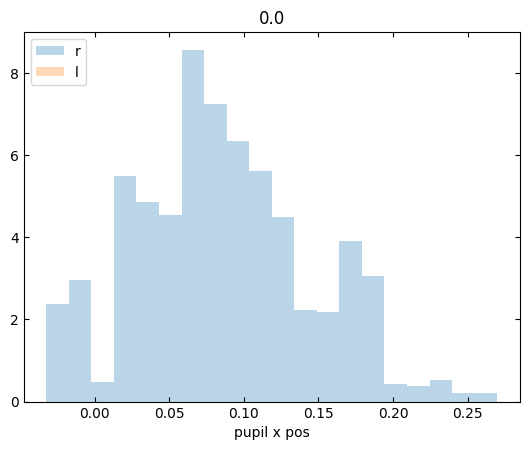

0.0 nan 0.086


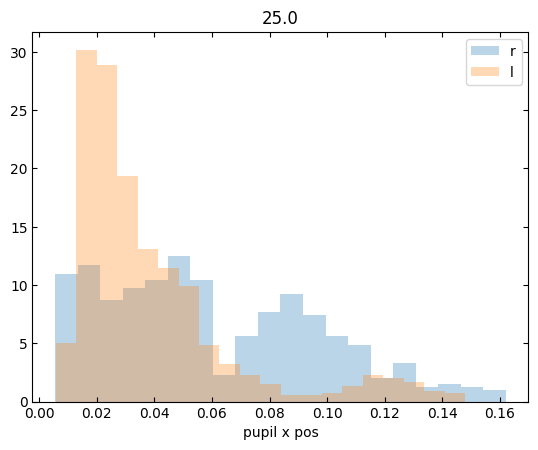

25.0 0.039 0.06


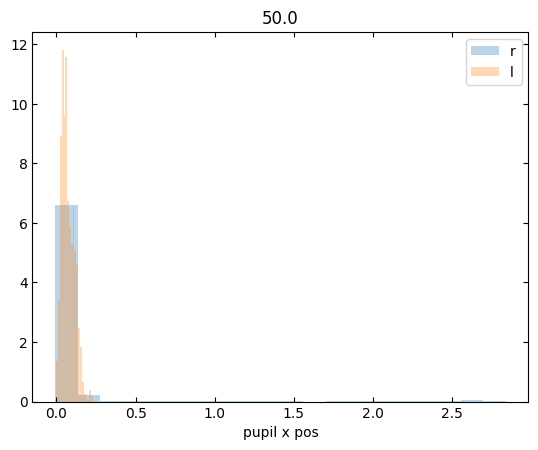

50.0 0.073 0.105


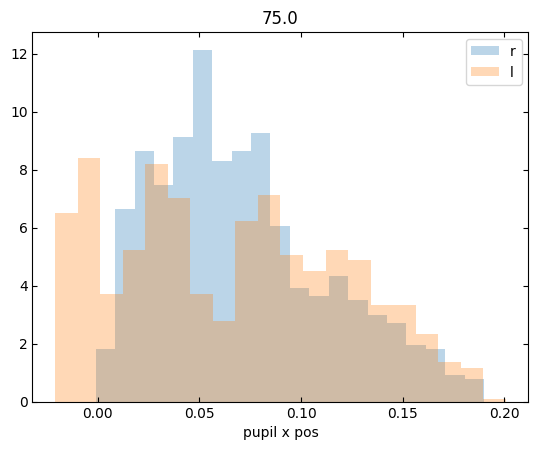

75.0 0.066 0.071


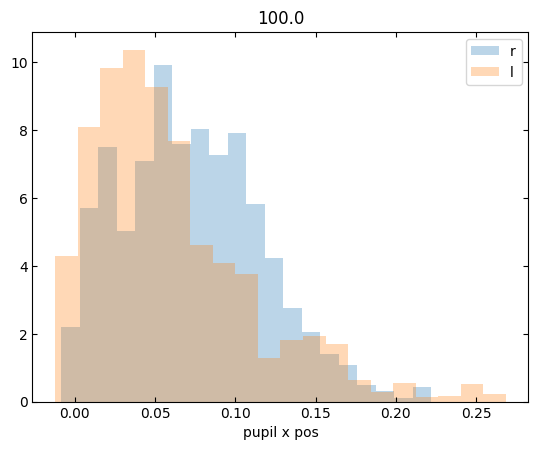

100.0 0.06 0.073


In [164]:
dat = dataset[["contrast_left","contrast_right","pupil_x","pupil_y","feedback_type", "response_type"]].to_dataframe()
dat['contrast_diff'] = (dat.contrast_left - dat.contrast_right).abs()
dat['response_turn']= 'No'
dat.loc[(dat['response_type'] == 1) , 'response_turn'] = 'R'
dat.loc[(dat['response_type'] == -1) , 'response_turn'] = 'L'

dat
dat=dat[(dat.feedback_type==1) &(dat.response_turn!='No')]
dat[["contrast_diff", "response_turn"]].value_counts()
for dif, dfg in dat.groupby('contrast_diff'):
    l=dfg[dfg.response_turn=='L']
    r=dfg[dfg.response_turn=='R']
    
    plt.hist(r.pupil_x, alpha=0.3, label='r', density=True,bins=20)
    plt.hist(l.pupil_x, alpha=0.3, label='l', density=True,bins=20)
    
    plt.legend()
    plt.title(dif)
    plt.xlabel('pupil x pos')
    plt.show()

    print(dif, np.round(l.pupil_x.mean(),3), np.round(r.pupil_x.mean(),3))

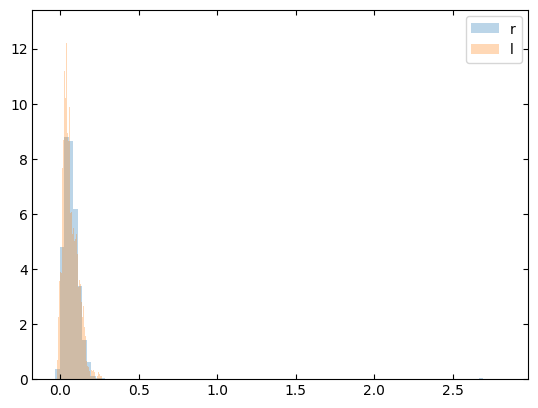

In [155]:
l=dat[dat.response_turn=='L']
r=dat[dat.response_turn=='R']

plt.hist(r.pupil_x, alpha=0.3, label='r', density=True,bins=100)
plt.hist(l.pupil_x, alpha=0.3, label='l', density=True,bins=100)

plt.legend()

(-0.03110897585014199,
 0.3819726691313123,
 -2.351315153509894,
 3.1999460924122927)

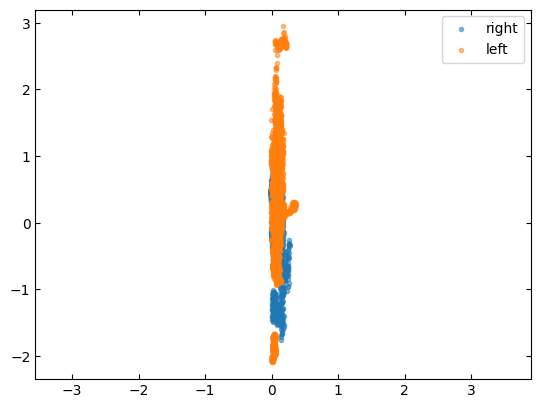

In [110]:

plt.scatter(r.pupil_x, r.pupil_y, marker='.', alpha=0.5, label='right')


plt.scatter(l.pupil_x, l.pupil_y, marker='.', alpha=0.5, label='left')
plt.legend()
plt.gca().axis('equal')

In [118]:
plt.hist?

Signature:
plt.hist(
    x: 'ArrayLike | Sequence[ArrayLike]',
    bins: 'int | Sequence[float] | str | None' = None,
    range: 'tuple[float, float] | None' = None,
    density: 'bool' = False,
    weights: 'ArrayLike | None' = None,
    cumulative: 'bool | float' = False,
    bottom: 'ArrayLike | float | None' = None,
    histtype: "Literal['bar', 'barstacked', 'step', 'stepfilled']" = 'bar',
    align: "Literal['left', 'mid', 'right']" = 'mid',
    orientation: "Literal['vertical', 'horizontal']" = 'vertical',
    rwidth: 'float | None' = None,
    log: 'bool' = False,
    color: 'ColorType | Sequence[ColorType] | None' = None,
    label: 'str | Sequence[str] | None' = None,
    stacked: 'bool' = False,
    *,
    data=None,
    **kwargs,
) -> 'tuple[np.ndarray | list[np.ndarray], np.ndarray, BarContainer | Polygon | list[BarContainer | Polygon]]'
Docstring:
Compute and plot a histogram.

This method uses `numpy.histogram` to bin the data in *x* and count the
number of values in eac